In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 1. Сгенерируйте массив из 500 точек на плоскости с координатами $(x, y)$, такими, что $x$ меняется от -1 до 1, а $y = 2x - 1 + \varepsilon$, где $\varepsilon \sim \mathcal{N}(0, 0.1)$

In [2]:
def my_function(x):
    return 2 * x - 1

In [3]:
x1 = np.random.uniform(-1, 1, 500)
y1 = my_function(x1) + np.random.normal(0, 0.1, 500)

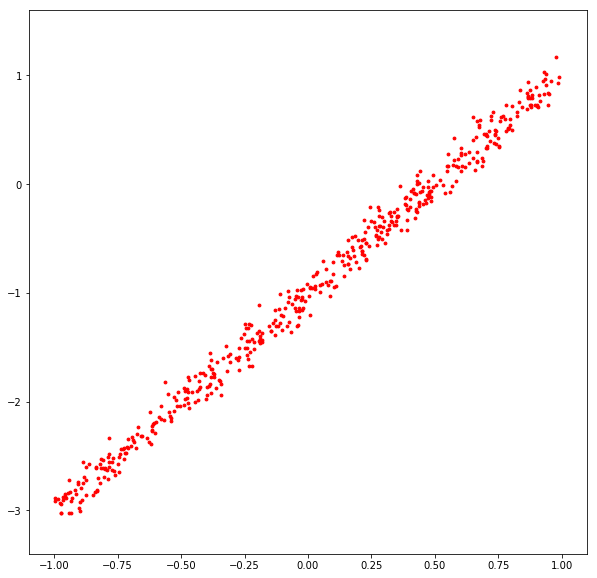

In [4]:
plt.figure(figsize=(10, 10))
plt.xlim(-1.1, 1.1)
plt.ylim(-3.4, 1.6)
plt.scatter(x1, y1, color='red', s=8)
plt.show()

## 2. Сгенерируйте массив из 100 точек на плоскости с координатами $(x, y)$, такими, что $x$ меняется от -1 до 1, а $y = 1 + \varepsilon$, где $\varepsilon \sim \mathcal{N}(0, 0.1)$

In [5]:
x2 = np.random.uniform(-1, 1, 100)
y2 = np.random.normal(0, 0.1, 100) + 1

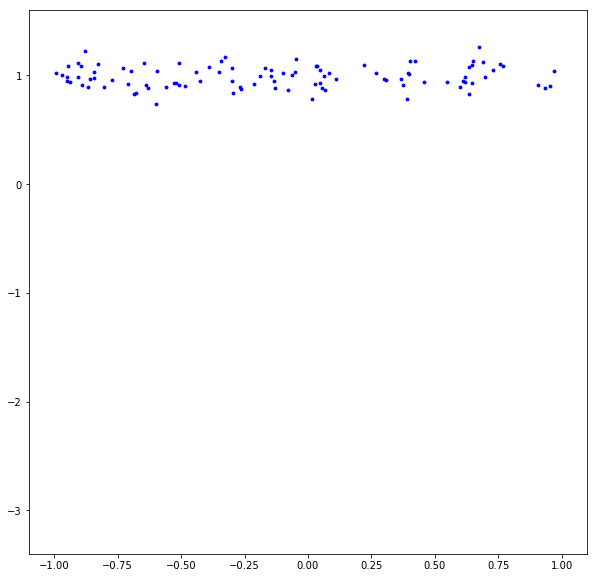

In [6]:
plt.figure(figsize=(10, 10))
plt.xlim(-1.1, 1.1)
plt.ylim(-3.4, 1.6)
plt.scatter(x2, y2, color='blue', s=8)
plt.show()

## 3. Изобразите первый и второй массив точек на плоскости (используя два разных цвета), а также график функии $f(x) = 2x - 1$ (используя какой-нибудь третий цвет)

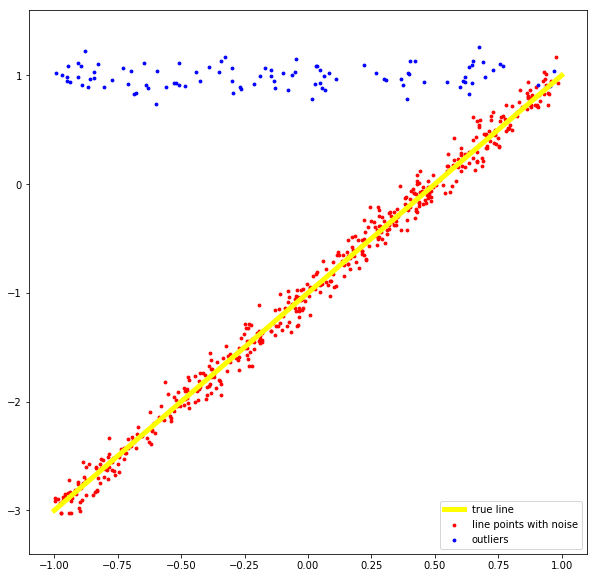

In [7]:
plt.figure(figsize=(10, 10))
plt.xlim(-1.1, 1.1)
plt.ylim(-3.4, 1.6)

x = np.array([-1, 1])
plt.plot(x, my_function(x), color='yellow', linewidth=5, label='true line')
plt.scatter(x1, y1, color='red', s=8, label='line points with noise')
plt.scatter(x2, y2, color='blue', s=8, label='outliers')

plt.legend(loc=4)
plt.show()

## 4. Решить задачу линейной регрессии

In [8]:
x = np.hstack((x1, x2))
y = np.hstack((y1, y2))

In [9]:
from scipy.optimize import minimize

def loss_function(coeffs):
    k, b = coeffs
    return sum((k * x + b - y)**2)

coeff = minimize(loss_function, [1, 1]).x
print coeff

[ 1.54234266 -0.62857667]


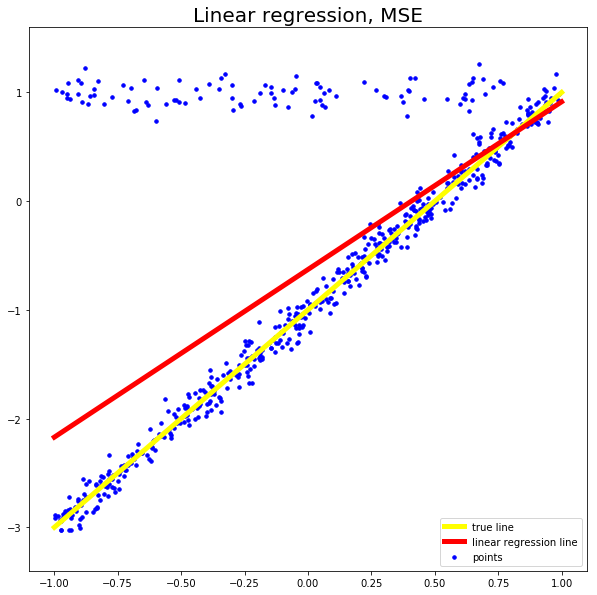

In [10]:
plt.figure(figsize=(10, 10))
plt.xlim(-1.1, 1.1)
plt.ylim(-3.4, 1.6)

x_plot = np.array([-1, 1])
y_plot = coeff[0] * x_plot + coeff[1]

plt.scatter(x, y, color='blue', s=12, label='points')
plt.plot(x_plot, my_function(x_plot), color='yellow', linewidth=5, label='true line')
plt.plot(x_plot, y_plot, color='red', linewidth=5, label='linear regression line')

plt.title('Linear regression, MSE', fontsize=20)
plt.legend(loc=4)
plt.show()

In [11]:
def loss_function(coeffs):
    k, b = coeffs
    return sum(abs(k * x + b - y))

coeff = minimize(loss_function, [1,1]).x
print coeff

[ 2.00031932 -0.9752288 ]


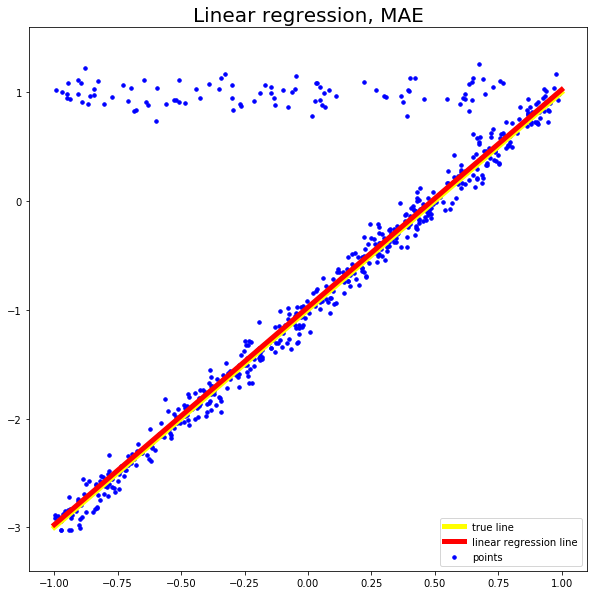

In [12]:
plt.figure(figsize=(10, 10))
plt.xlim(-1.1, 1.1)
plt.ylim(-3.4, 1.6)

x_plot = np.array([-1, 1])
y_plot = coeff[0] * x_plot + coeff[1]

plt.scatter(x, y, color='blue', s=12, label='points')
plt.plot(x_plot, my_function(x_plot), color='yellow', linewidth=5, label='true line')
plt.plot(x_plot, y_plot, color='red', linewidth=5, label='linear regression line')

plt.title('Linear regression, MAE', fontsize=20)
plt.legend(loc=4)
plt.show()